## ヒートマップでやりたいこと
- 縦bit, 横chain_strength, 値valid_y_num
- 縦bit, 横chain_strength, 値broken_chain_proportion

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import QA_DwaveSampler_AutoEmbedding as qda
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import statistics
import math
%matplotlib inline

In [6]:
chain_strength_list = [5, 10, 15, 20, 25, 30, 35]
#chain_strength_dic = {20:10, 25:15, 30:20, 35:20, 40:30}

In [7]:
bit_list = [20, 25, 30, 35, 40]
num_list = [0, 1, 2, 3, 4]
n, num_reads = 1, 10000

## それぞれのbit_numにたいして5回、それぞれのbitデータに対して25回回し、データを得る

In [1]:
broken_chain_proportion_dic = {20: {5: [0.35, 0.45, 0.3, 0.45555555555555555, 0.35, 0.37, 0.05, 0.275],
  10: [0.004272151898734177,
   0.004285714285714286,
   0.008152173913043478,
   0.002980132450331126,
   0.002272727272727273,
   0.008672566371681416,
   0.0039603960396039604,
   0.0077669902912621365,
   0.0027173913043478264,
   0.005128205128205128,
   0.008466135458167332,
   0.0034782608695652175,
   0.005094339622641509,
   0.00531496062992126,
   0.0023437500000000003,
   0.010787172011661808,
   0.004347826086956522,
   0.0033492822966507177,
   0.0033333333333333335,
   0.0020408163265306124,
   0.00686046511627907,
   0.003551912568306011,
   0.0036231884057971015,
   0.004320987654320988,
   0.010465116279069767],
  15: [0.002655538694992413,
   0.002066115702479339,
   0.0007220216606498196,
   0.0020689655172413794,
   0.0,
   0.0010416666666666667,
   0.0003289473684210526,
   0.0023465703971119133,
   0.0012048192771084338,
   0.0,
   0.003945480631276901,
   0.0015151515151515152,
   0.003787878787878788,
   0.0024193548387096775,
   0.0,
   0.002285714285714286,
   0.002898550724637681,
   0.0026690391459074734,
   0.0010714285714285715,
   0.0,
   0.001910828025477707,
   0.001769911504424779,
   0.0017857142857142859,
   0.001282051282051282,
   0.0],
  20: [0.0015090543259557345,
   0.0033333333333333335,
   0.0014124293785310734,
   0.0016,
   0.0,
   0.0012195121951219512,
   0.0005208333333333333,
   0.0013513513513513514,
   0.0010204081632653062,
   0.002380952380952381,
   0.0021335807050092766,
   0.0,
   0.001675977653631285,
   0.0008333333333333334,
   0.002,
   0.002151639344262295,
   0.0016778523489932888,
   0.001360544217687075,
   0.0,
   0.0,
   0.0006476683937823834,
   0.002142857142857143,
   0.000986842105263158,
   0.0009090909090909091,
   0.0],
  25: [0.0014925373134328358,
   0.0010204081632653062,
   0.0014522821576763486,
   0.0005813953488372093,
   0.0,
   0.0001392757660167131,
   0.0008474576271186442,
   0.0009852216748768474,
   0.0014705882352941176,
   0.0035714285714285718,
   0.0007829977628635347,
   0.002173913043478261,
   0.001282051282051282,
   0.0012987012987012987,
   0.0,
   0.0019699812382739214,
   0.002380952380952381,
   0.0008547008547008547,
   0.0,
   0.003703703703703704,
   0.00078125,
   0.0025423728813559325,
   0.0007299270072992701,
   0.0011764705882352942,
   0.0],
  30: [0.0013819095477386936,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0007954545454545455,
   0.0,
   0.001953125,
   0.000641025641025641,
   0.0,
   0.0013483146067415732,
   0.0025,
   0.0013636363636363637,
   0.0,
   0.0,
   0.0010606060606060607,
   0.0,
   0.0009174311926605505,
   0.0007936507936507937,
   0.0,
   0.0012345679012345679,
   0.0009090909090909091,
   0.0,
   0.0016304347826086958,
   0.0],
  35: [0.0013392857142857143,
   0.0014925373134328358,
   0.0,
   0.0025,
   0.0,
   0.0017899761336515514,
   0.0015151515151515152,
   0.0,
   0.0017857142857142859,
   0.0,
   0.001288056206088993,
   0.0013157894736842105,
   0.0015306122448979593,
   0.0,
   0.0,
   0.0013409961685823756,
   0.0018072289156626507,
   0.0,
   0.0,
   0.0,
   0.00048780487804878054,
   0.0017857142857142859,
   0.0020547945205479454,
   0.0,
   0.005]},
 25: {5: [0.44, 0.4, 0.5466666666666666, 0.42],
  10: [0.019130434782608695,
   0.04,
   0.005714285714285714,
   0.017777777777777778,
   0.01818181818181818,
   0.013023255813953489,
   0.01707317073170732,
   0.012,
   0.016,
   0.028,
   0.014,
   0.03230769230769231,
   0.02,
   0.0064516129032258064,
   0.027307692307692307,
   0.028085106382978724,
   0.04789808917197452,
   0.009230769230769232,
   0.04,
   0.013176470588235295,
   0.010256410256410256,
   0.038688524590163934,
   0.04,
   0.013333333333333334,
   0.006857142857142858],
  15: [0.0033333333333333335,
   0.0036260623229461757,
   0.0023529411764705885,
   0.0,
   0.002795698924731183,
   0.0029090909090909093,
   0.005276595744680851,
   0.0036363636363636364,
   0.0,
   0.005517241379310345,
   0.0036363636363636364,
   0.004819277108433735,
   0.005714285714285714,
   0.01,
   0.002011173184357542,
   0.0032,
   0.002762762762762763,
   0.002285714285714286,
   0.0,
   0.0038095238095238095,
   0.002857142857142857,
   0.0032369942196531793,
   0.0024000000000000002,
   0.006666666666666667,
   0.0033333333333333335],
  20: [0.005161290322580645,
   0.002191780821917808,
   0.003870967741935484,
   0.0,
   0.005090909090909091,
   0.0,
   0.0025092250922509225,
   0.0023529411764705885,
   0.004705882352941177,
   0.0024691358024691358,
   0.0032653061224489797,
   0.0029714285714285715,
   0.0011764705882352942,
   0.0,
   0.0035555555555555557,
   0.0008333333333333334,
   0.001694915254237288,
   0.0032,
   0.0036363636363636364,
   0.002777777777777778,
   0.0016326530612244899,
   0.002162162162162162,
   0.0,
   0.004,
   0.0013636363636363637],
  25: [0.002285714285714286,
   0.0017777777777777779,
   0.0,
   0.0,
   0.0,
   0.0011594202898550724,
   0.0012244897959183673,
   0.0,
   0.0,
   0.0009090909090909091,
   0.001,
   0.0012834224598930481,
   0.007272727272727273,
   0.0,
   0.0025,
   0.0008,
   0.0013559322033898306,
   0.0,
   0.0,
   0.002033898305084746,
   0.002,
   0.0005128205128205128,
   0.001142857142857143,
   0.0,
   0.001702127659574468],
  30: [0.0,
   0.00047058823529411766,
   0.0,
   0.0,
   0.0,
   0.006,
   0.0017857142857142857,
   0.002857142857142857,
   0.0,
   0.0027586206896551726,
   0.004705882352941177,
   0.00125,
   0.007619047619047619,
   0.003076923076923077,
   0.0026666666666666666,
   0.0,
   0.0023880597014925373,
   0.002962962962962963,
   0.0036363636363636364,
   0.0,
   0.0,
   0.00062015503875969,
   0.0,
   0.0],
  35: [0.0,
   0.0013953488372093023,
   0.0,
   0.0,
   0.0015384615384615385,
   0.0,
   0.001142857142857143,
   0.0,
   0.0,
   0.0048000000000000004,
   0.00035398230088495576,
   0.0,
   0.0,
   0.0,
   0.0022222222222222222,
   0.0022471910112359553,
   0.001702127659574468,
   0.01,
   0.0009302325581395349,
   0.0,
   0.0011111111111111111,
   0.0,
   0.0,
   0.0015384615384615385]},
 30: {5: [0.4, 0.5380952380952381, 0.5333333333333333],
  10: [0.10833333333333334,
   0.1,
   0.13333333333333333,
   0.19534883720930232,
   0.054901960784313725,
   0.24285714285714285,
   0.1,
   0.07741935483870968,
   0.016666666666666666,
   0.12,
   0.11111111111111112,
   0.06666666666666667,
   0.10476190476190476,
   0.1,
   0.06666666666666667,
   0.08205128205128205,
   0.15789473684210525,
   0.049999999999999996,
   0.03333333333333333,
   0.192],
  15: [0.008333333333333333,
   0.007407407407407408,
   0.0047619047619047615,
   0.0,
   0.009583333333333333,
   0.01717171717171717,
   0.0,
   0.012962962962962963,
   0.019047619047619046,
   0.019047619047619046,
   0.005,
   0.03333333333333333,
   0.008333333333333333,
   0.014444444444444444,
   0.010447761194029851,
   0.008108108108108109,
   0.012121212121212121,
   0.013333333333333332,
   0.013333333333333332,
   0.011111111111111112,
   0.0,
   0.012121212121212121,
   0.012612612612612612,
   0.00404040404040404,
   0.015909090909090907],
  20: [0.004166666666666667,
   0.0030303030303030303,
   0.004,
   0.00909090909090909,
   0.002631578947368421,
   0.0031746031746031746,
   0.0,
   0.0014492753623188406,
   0.003703703703703704,
   0.006944444444444444,
   0.003333333333333333,
   0.016666666666666666,
   0.004,
   0.009523809523809523,
   0.005526770293609672,
   0.0,
   0.0,
   0.0030303030303030303,
   0.006666666666666666,
   0.0050890585241730275,
   0.0,
   0.0,
   0.00392156862745098,
   0.004901960784313725,
   0.004828660436137072],
  25: [0.005555555555555556,
   0.004065040650406504,
   0.009523809523809523,
   0.0031746031746031746,
   0.0,
   0.003703703703703704,
   0.002564102564102564,
   0.0,
   0.004624277456647399,
   0.0,
   0.004545454545454545,
   0.02,
   0.005925925925925926,
   0.0,
   0.0,
   0.0022598870056497176,
   0.016666666666666666,
   0.004530744336569579,
   0.0047619047619047615,
   0.008888888888888889,
   0.0,
   0.0,
   0.003846153846153846],
  30: [0.0,
   0.0,
   0.0020833333333333333,
   0.004487179487179487,
   0.011111111111111112,
   0.0,
   0.005128205128205128,
   0.0,
   0.0021164021164021165,
   0.004166666666666667,
   0.006666666666666666,
   0.000980392156862745,
   0.004878048780487805,
   0.0,
   0.0,
   0.0024691358024691358,
   0.0011904761904761904,
   0.003977272727272727,
   0.003703703703703704,
   0.0,
   0.003703703703703704,
   0.0026936026936026937],
  35: [0.0,
   0.0,
   0.002564102564102564,
   0.002777777777777778,
   0.002880658436213992,
   0.008333333333333333,
   0.0047619047619047615,
   0.0,
   0.0,
   0.0036144578313253013,
   0.0,
   0.0,
   0.002777777777777778,
   0.0,
   0.0023391812865497076,
   0.0,
   0.0,
   0.011111111111111112,
   0.0,
   0.0028169014084507044,
   0.0017543859649122807,
   0.0,
   0.0,
   0.00375]},
 35: {5: [1],#
  10: [0.2571428571428571,
   0.29523809523809524,
   0.2608695652173913,
   0.3090909090909091],
  15: [0.014285714285714285,
   0.04360902255639098,
   0.06386554621848739,
   0.08653061224489796,
   0.05714285714285714,
   0.04285714285714286,
   0.02857142857142857,
   0.12593984962406016,
   0.019047619047619046,
   0.06428571428571428,
   0.09999999999999999,
   0.02857142857142857,
   0.14285714285714285,
   0.014285714285714285,
   0.0,
   0.09523809523809525,
   0.06563706563706563,
   0.0,
   0.09999999999999999,
   0.05714285714285714,
   0.019047619047619046,
   0.08571428571428572],
  20: [0.011428571428571429,
   0.009523809523809523,
   0.021645021645021644,
   0.005714285714285714,
   0.012454212454212453,
   0.004081632653061224,
   0.012987012987012986,
   0.012698412698412698,
   0.023076923076923078,
   0.023015873015873014,
   0.015584415584415584,
   0.004571428571428571,
   0.022857142857142857,
   0.0,
   0.010989010989010988,
   0.0,
   0.0025974025974025974,
   0.014285714285714285,
   0.005714285714285714,
   0.02077922077922078,
   0.009523809523809523,
   0.009022556390977444,
   0.007792207792207792,
   0.02,
   0.02142857142857143],
  25: [0.006349206349206349,
   0.0050420168067226885,
   0.007142857142857143,
   0.005714285714285714,
   0.014285714285714285,
   0.011428571428571429,
   0.005194805194805195,
   0.012244897959183673,
   0.0032967032967032967,
   0.0,
   0.010714285714285714,
   0.006593406593406593,
   0.02857142857142857,
   0.01164021164021164,
   0.009523809523809523,
   0.006349206349206349,
   0.006722689075630252,
   0.015384615384615384,
   0.014285714285714285,
   0.014285714285714285,
   0.004081632653061224,
   0.0023809523809523807,
   0.0047619047619047615,
   0.004571428571428571],
  30: [0.009523809523809523,
   0.005714285714285714,
   0.0037735849056603774,
   0.005714285714285714,
   0.008163265306122448,
   0.0,
   0.0,
   0.005079365079365079,
   0.005714285714285714,
   0.0,
   0.0047619047619047615,
   0.0,
   0.004395604395604396,
   0.0031746031746031746,
   0.0,
   0.007792207792207792,
   0.0023809523809523807,
   0.0,
   0.0035714285714285713,
   0.0031746031746031746,
   0.014285714285714285,
   0.0,
   0.010989010989010988],
  35: [0.0031746031746031746,
   0.0035714285714285713,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0047619047619047615,
   0.0019704433497536944,
   0.0031746031746031746,
   0.0,
   0.0,
   0.006349206349206349,
   0.0,
   0.008571428571428572,
   0.0047619047619047615,
   0.007936507936507936,
   0.0,
   0.002857142857142857,
   0.0,
   0.0,
   0.0,
   0.0]},
 40: {5: [0.6625000000000001],
  10: [0.35, 0.325],
  15: [0.05416666666666667,
   0.11029411764705882,
   0.175,
   0.08125,
   0.125,
   0.2,
   0.14166666666666666,
   0.14583333333333334,
   0.1,
   0.116,
   0.17083333333333334,
   0.15486725663716813,
   0.055],
  20: [0.03571428571428571,
   0.0,
   0.00625,
   0.018750000000000003,
   0.018750000000000003,
   0.03333333333333333,
   0.039285714285714285,
   0.025,
   0.0,
   0.025,
   0.027083333333333334,
   0.0625,
   0.0125,
   0.02878787878787879,
   0.009375000000000001,
   0.025,
   0.025,
   0.03392857142857143,
   0.05892857142857143,
   0.0],
  25: [0.025,
   0.025,
   0.0125,
   0.018750000000000003,
   0.008333333333333333,
   0.025,
   0.030000000000000002,
   0.008333333333333333,
   0.007500000000000001,
   0.0,
   0.016071428571428573,
   0.016666666666666666,
   0.016666666666666666,
   0.0,
   0.0,
   0.004166666666666667,
   0.009090909090909092,
   0.024999999999999998,
   0.0,
   0.018750000000000003,
   0.004545454545454546,
   0.05,
   0.024999999999999998],
  30: [0.01,
   0.0,
   0.0,
   0.05,
   0.0,
   0.018750000000000003,
   0.003125,
   0.0,
   0.0125,
   0.0,
   0.0,
   0.01,
   0.0,
   0.008333333333333333,
   0.005,
   0.0035714285714285718,
   0.0,
   0.0171875,
   0.0125,
   0.009375000000000001,
   0.025,
   0.009375000000000001],
  35: [0.00625,
   0.0125,
   0.025,
   0.005,
   0.0125,
   0.0,
   0.00625,
   0.0125,
   0.025,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0125,
   0.008333333333333333,
   0.008333333333333333,
   0.0]}}

In [2]:
valid_y_num_dic = {20: {5: [2, 3, 2, 9, 1, 5, 1, 2],
  10: [632,
   105,
   184,
   151,
   22,
   565,
   101,
   103,
   184,
   78,
   502,
   115,
   265,
   254,
   64,
   343,
   115,
   209,
   105,
   49,
   430,
   183,
   345,
   162,
   43],
  15: [659,
   121,
   277,
   145,
   25,
   528,
   152,
   277,
   166,
   19,
   697,
   33,
   132,
   248,
   14,
   525,
   69,
   281,
   140,
   24,
   471,
   113,
   196,
   117,
   21],
  20: [497,
   30,
   177,
   125,
   13,
   410,
   96,
   185,
   49,
   21,
   539,
   24,
   179,
   60,
   25,
   488,
   149,
   147,
   100,
   13,
   386,
   70,
   152,
   110,
   27],
  25: [402,
   49,
   241,
   86,
   48,
   359,
   59,
   203,
   136,
   14,
   447,
   46,
   195,
   77,
   8,
   533,
   63,
   117,
   58,
   27,
   448,
   59,
   137,
   85,
   22],
  30: [398,
   80,
   107,
   70,
   14,
   440,
   59,
   128,
   78,
   9,
   445,
   20,
   110,
   83,
   5,
   330,
   46,
   109,
   63,
   25,
   405,
   55,
   131,
   92,
   17],
  35: [336,
   67,
   123,
   20,
   5,
   419,
   33,
   123,
   28,
   3,
   427,
   38,
   98,
   59,
   6,
   261,
   83,
   69,
   37,
   21,
   205,
   28,
   146,
   67,
   10]},
 25: {5: [1, 1, 6, 2],
  10: [46,
   51,
   7,
   18,
   154,
   43,
   164,
   20,
   5,
   10,
   20,
   26,
   10,
   62,
   104,
   47,
   157,
   13,
   1,
   85,
   39,
   61,
   2,
   9,
   70],
  15: [24,
   353,
   34,
   4,
   186,
   55,
   235,
   11,
   3,
   87,
   66,
   249,
   28,
   8,
   179,
   75,
   333,
   35,
   9,
   21,
   28,
   173,
   50,
   12,
   84],
  20: [31,
   146,
   31,
   6,
   55,
   36,
   271,
   17,
   17,
   81,
   49,
   175,
   34,
   3,
   45,
   48,
   118,
   25,
   11,
   72,
   49,
   148,
   22,
   10,
   88],
  25: [35,
   90,
   10,
   5,
   28,
   69,
   98,
   15,
   3,
   44,
   40,
   187,
   11,
   6,
   48,
   50,
   59,
   20,
   13,
   59,
   40,
   78,
   35,
   5,
   47],
  30: [21,
   85,
   28,
   5,
   26,
   20,
   112,
   14,
   2,
   29,
   17,
   64,
   21,
   13,
   15,
   20,
   67,
   27,
   11,
   66,
   19,
   129,
   17,
   44],
  35: [40,
   86,
   22,
   1,
   26,
   15,
   70,
   10,
   30,
   25,
   113,
   7,
   6,
   18,
   18,
   89,
   47,
   4,
   43,
   14,
   72,
   26,
   1,
   26]},
 30: {5: [1, 7, 1],
  10: [4, 2, 2, 43, 17, 7, 1, 31, 2, 5, 3, 3, 7, 2, 1, 13, 76, 4, 1, 25],
  15: [8,
   9,
   14,
   1,
   160,
   33,
   7,
   18,
   7,
   133,
   20,
   7,
   36,
   30,
   335,
   37,
   11,
   80,
   15,
   192,
   4,
   11,
   37,
   33,
   44],
  20: [8,
   22,
   25,
   11,
   76,
   21,
   3,
   23,
   9,
   120,
   20,
   6,
   25,
   7,
   193,
   12,
   4,
   33,
   5,
   131,
   10,
   6,
   34,
   34,
   214],
  25: [6,
   41,
   7,
   105,
   4,
   9,
   26,
   12,
   173,
   10,
   22,
   5,
   45,
   4,
   1,
   59,
   2,
   103,
   7,
   15,
   27,
   9,
   104],
  30: [4,
   2,
   16,
   52,
   3,
   1,
   13,
   6,
   63,
   8,
   5,
   34,
   82,
   2,
   3,
   27,
   28,
   176,
   9,
   1,
   9,
   99],
  35: [2,
   2,
   13,
   12,
   81,
   8,
   7,
   11,
   3,
   83,
   4,
   4,
   12,
   7,
   114,
   3,
   3,
   12,
   18,
   71,
   19,
   4,
   2,
   80]},
 35: {5: [0],
  10: [1, 3, 23, 22],
  15: [2,
   19,
   17,
   35,
   16,
   2,
   2,
   76,
   3,
   4,
   2,
   2,
   11,
   2,
   2,
   3,
   37,
   2,
   12,
   1,
   3,
   21],
  20: [10,
   6,
   33,
   10,
   39,
   7,
   22,
   18,
   26,
   36,
   11,
   25,
   15,
   4,
   13,
   4,
   11,
   24,
   5,
   22,
   3,
   19,
   11,
   10,
   12],
  25: [9,
   17,
   12,
   15,
   10,
   5,
   11,
   7,
   26,
   1,
   8,
   26,
   3,
   27,
   3,
   27,
   34,
   13,
   16,
   10,
   7,
   12,
   6,
   25],
  30: [3,
   15,
   53,
   5,
   28,
   2,
   2,
   45,
   5,
   1,
   12,
   17,
   13,
   18,
   3,
   11,
   12,
   1,
   8,
   9,
   12,
   3,
   13],
  35: [9,
   16,
   10,
   2,
   4,
   1,
   18,
   29,
   9,
   1,
   6,
   9,
   1,
   10,
   6,
   18,
   2,
   10,
   4,
   15,
   2,
   1]},
 40: {5: [2],
  10: [1, 1],
  15: [6, 17, 3, 4, 2, 1, 3, 6, 1, 25, 30, 113, 5],
  20: [7, 1, 4, 4, 4, 3, 14, 2, 2, 9, 12, 4, 8, 33, 8, 1, 1, 14, 14, 1],
  25: [1,
   3,
   4,
   4,
   6,
   2,
   5,
   6,
   10,
   1,
   14,
   3,
   3,
   3,
   2,
   6,
   11,
   3,
   2,
   4,
   11,
   1,
   3],
  30: [5, 7, 1, 1, 2, 4, 8, 2, 2, 3, 6, 10, 1, 3, 5, 7, 3, 16, 2, 8, 1, 8],
  35: [4, 2, 1, 5, 6, 3, 12, 2, 1, 3, 1, 5, 2, 2, 3, 3, 2]}}

In [10]:
bit = 20
chain_strength = 5
broken_chain_proportion_dic[bit][chain_strength]

[0.35, 0.45, 0.3, 0.45555555555555555, 0.35, 0.37, 0.05, 0.275]

In [11]:
for bit in bit_list:
    for chain_strength in chain_strength_list:
        broken_chain_proportion_dic[bit][chain_strength] = statistics.mean(broken_chain_proportion_dic[bit][chain_strength])

In [12]:
broken_chain_proportion_dic

{20: {5: 0.32506944444444447,
  10: 0.005103439824594083,
  15: 0.0015910299553217586,
  20: 0.0012346904246301844,
  25: 0.001249504675982493,
  30: 0.0006611698937779357,
  35: 0.0010813464662185242},
 25: {5: 0.45166666666666666,
  10: 0.02137974347727079,
  15: 0.0034472226002065817,
  20: 0.002424869393115132,
  25: 0.0011584111445881373,
  30: 0.0017832552967901583,
  35: 0.001207583163339907},
 30: {5: 0.49047619047619045,
  10: 0.10566731652279358,
  15: 0.010902607482458228,
  20: 0.004227211292271243,
  25: 0.004549422548088798,
  30: 0.0026979954667337826,
  35: 0.0020617330105608045},
 35: {5: 1,
  10: 0.2805853566723132,
  15: 0.057028623424023685,
  20: 0.012070860868454852,
  25: 0.008773585748725804,
  30: 0.004269952673210613,
  35: 0.002142235159476539},
 40: {5: 0.6625000000000001,
  10: 0.3375,
  15: 0.1253777980218636,
  20: 0.024259334415584418,
  25: 0.015059759081498213,
  30: 0.008850784632034633,
  35: 0.007892156862745098}}

In [15]:
for bit in bit_list:
    broken_chain_proportion_dic[bit] = list(broken_chain_proportion_dic[bit].values())

In [17]:
list(broken_chain_proportion_dic.values())

[[0.32506944444444447,
  0.005103439824594083,
  0.0015910299553217586,
  0.0012346904246301844,
  0.001249504675982493,
  0.0006611698937779357,
  0.0010813464662185242],
 [0.45166666666666666,
  0.02137974347727079,
  0.0034472226002065817,
  0.002424869393115132,
  0.0011584111445881373,
  0.0017832552967901583,
  0.001207583163339907],
 [0.49047619047619045,
  0.10566731652279358,
  0.010902607482458228,
  0.004227211292271243,
  0.004549422548088798,
  0.0026979954667337826,
  0.0020617330105608045],
 [1,
  0.2805853566723132,
  0.057028623424023685,
  0.012070860868454852,
  0.008773585748725804,
  0.004269952673210613,
  0.002142235159476539],
 [0.6625000000000001,
  0.3375,
  0.1253777980218636,
  0.024259334415584418,
  0.015059759081498213,
  0.008850784632034633,
  0.007892156862745098]]

In [13]:
for bit in bit_list:
    for chain_strength in chain_strength_list:
        valid_y_num_dic[bit][chain_strength] = statistics.mean(valid_y_num_dic[bit][chain_strength])

In [14]:
valid_y_num_dic

{20: {5: 3.125,
  10: 212.36,
  15: 218,
  20: 162.88,
  25: 156.76,
  30: 132.76,
  35: 108.48},
 25: {5: 2.5,
  10: 48.96,
  15: 93.68,
  20: 63.52,
  25: 43.8,
  30: 36.333333333333336,
  35: 33.708333333333336},
 30: {5: 3,
  10: 12.45,
  15: 51.28,
  20: 42.08,
  25: 34.608695652173914,
  30: 29.227272727272727,
  35: 23.958333333333332},
 35: {5: 0,
  10: 12.25,
  15: 12.454545454545455,
  20: 15.84,
  25: 13.75,
  30: 12.652173913043478,
  35: 8.318181818181818},
 40: {5: 2,
  10: 1,
  15: 16.615384615384617,
  20: 7.3,
  25: 4.695652173913044,
  30: 4.7727272727272725,
  35: 3.3529411764705883}}

In [18]:
for bit in bit_list:
    valid_y_num_dic[bit] = list(valid_y_num_dic[bit].values())

In [19]:
valid_y_num_dic

{20: [3.125, 212.36, 218, 162.88, 156.76, 132.76, 108.48],
 25: [2.5, 48.96, 93.68, 63.52, 43.8, 36.333333333333336, 33.708333333333336],
 30: [3,
  12.45,
  51.28,
  42.08,
  34.608695652173914,
  29.227272727272727,
  23.958333333333332],
 35: [0,
  12.25,
  12.454545454545455,
  15.84,
  13.75,
  12.652173913043478,
  8.318181818181818],
 40: [2,
  1,
  16.615384615384617,
  7.3,
  4.695652173913044,
  4.7727272727272725,
  3.3529411764705883]}

In [20]:
list(valid_y_num_dic.values())

[[3.125, 212.36, 218, 162.88, 156.76, 132.76, 108.48],
 [2.5, 48.96, 93.68, 63.52, 43.8, 36.333333333333336, 33.708333333333336],
 [3,
  12.45,
  51.28,
  42.08,
  34.608695652173914,
  29.227272727272727,
  23.958333333333332],
 [0,
  12.25,
  12.454545454545455,
  15.84,
  13.75,
  12.652173913043478,
  8.318181818181818],
 [2,
  1,
  16.615384615384617,
  7.3,
  4.695652173913044,
  4.7727272727272725,
  3.3529411764705883]]

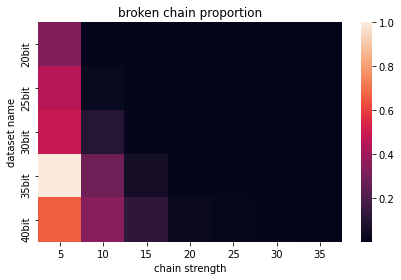

In [21]:
import seaborn as sns

names = ['{}bit'.format(i) for i in bit_list]

sns.heatmap(list(broken_chain_proportion_dic.values()),xticklabels=chain_strength_list,yticklabels=names)

plt.xlabel('chain strength')
plt.ylabel('dataset name')
plt.title('broken chain proportion')

plt.tight_layout()
plt.savefig('broken_chain_proportion.png')
plt.show()

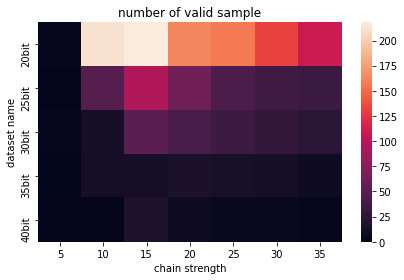

In [22]:
import seaborn as sns

names = ['{}bit'.format(i) for i in bit_list]

sns.heatmap(list(valid_y_num_dic.values()),xticklabels=chain_strength_list,yticklabels=names)

plt.xlabel('chain strength')
plt.ylabel('dataset name')
plt.title('number of valid sample')

plt.tight_layout()
plt.savefig('chain_strength_valid_y_num')
plt.show()